In [1]:
import torch
import torch.nn as nn
import numpy as np
import os
import pickle

In [2]:
obj_path = 'sampleSTAR2.obj'
objFile = open(obj_path, 'r')

vList = []
vtList = []
vnList = []
fList__ = []
fList = []  

for line in objFile:
    split = line.split()
    #if blank line, skip
    if not len(split):
        continue
    if split[0] == "v":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vList.append(float_lst)
    elif split[0] == "vt":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vtList.append(float_lst)
    elif split[0] == "vn":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vnList.append(float_lst)
    elif split[0] == "f":
        fList__.append(split[1:])
        new = []
        for value in split[1:]:
            each = value.split('/')
            int_lst = list(np.array(each, dtype='int'))
            new.append(int_lst)
        fList.append(new)
                
vList_ = torch.as_tensor(vList)
vtList_ = torch.as_tensor(vtList)
vnList_ = torch.as_tensor(vnList)
fList_ = torch.as_tensor(fList)

print('v')
print(vList_.shape)
print(vList_, '\n')

print('vt')
print(vtList_.shape)
print(vtList_, '\n')

print('vn')
print(vnList_.shape)
print(vnList_, '\n')

print('f : v, vt, vn')
print(fList_.shape)
print(fList_)

v
torch.Size([6890, 3])
tensor([[ 0.0475,  0.5130,  0.0858],
        [ 0.0425,  0.5003,  0.0966],
        [ 0.0538,  0.4950,  0.0880],
        ...,
        [-0.0768,  0.4450, -0.0029],
        [-0.0771,  0.4470, -0.0013],
        [-0.0799,  0.4448,  0.0020]], dtype=torch.float64) 

vt
torch.Size([7576, 2])
tensor([[0.3595, 0.8661],
        [0.3792, 0.8631],
        [0.3716, 0.8811],
        ...,
        [0.0117, 0.2181],
        [0.0111, 0.3257],
        [0.0160, 0.3907]], dtype=torch.float64) 

vn
torch.Size([0])
tensor([]) 

f : v, vt, vn
torch.Size([13776, 3, 2])
tensor([[[   2,    1],
         [   3,    2],
         [   1,    3]],

        [[   1,    3],
         [   3,    2],
         [   4,    4]],

        [[   3,    2],
         [   2,    1],
         [   5,    5]],

        ...,

        [[4806, 5146],
         [3512, 3830],
         [6310, 6856]],

        [[3512, 3830],
         [1331, 1332],
         [6310, 6856]],

        [[6310, 6856],
         [1331, 1332],
         [46

In [3]:
print(len(fList))

13776


In [4]:
foot_f = []

for i in range (len(fList)):
    # triangle의 모든 y좌표가 0.1보다 작음 
    if(vList[fList[i][0][0]-1][1]<-1.1 and vList[fList[i][1][0]-1][1]<-1.1 and vList[fList[i][2][0]-1][1]<-1.1):
        if(vList[fList[i][0][0]-1][0]>0):
            foot_f.append(fList[i])
        
print(len(foot_f))
print(foot_f)

497
[[[3213, 3452], [3214, 3453], [3212, 3454]], [[3212, 3454], [3214, 3453], [3215, 3455]], [[3217, 3456], [3218, 3457], [3216, 3458]], [[3216, 3458], [3218, 3457], [3219, 3459]], [[3221, 3460], [3222, 3461], [3220, 3462]], [[3220, 3462], [3222, 3461], [3223, 3463]], [[3225, 3464], [3226, 3465], [3224, 3466]], [[3224, 3466], [3226, 3465], [3227, 3467]], [[3229, 3468], [3230, 3469], [3228, 3470]], [[3228, 3470], [3230, 3469], [3231, 3471]], [[3233, 3472], [3234, 3473], [3232, 3474]], [[3232, 3474], [3234, 3473], [3235, 3475]], [[3237, 3476], [3238, 3477], [3236, 3478]], [[3236, 3478], [3238, 3477], [3239, 3479]], [[3238, 3477], [3240, 3480], [3239, 3479]], [[3239, 3479], [3240, 3480], [3241, 3481]], [[3232, 3474], [3235, 3475], [3242, 3482]], [[3242, 3482], [3235, 3475], [3243, 3483]], [[3245, 3484], [3246, 3485], [3244, 3486]], [[3244, 3486], [3246, 3485], [3247, 3487]], [[3248, 3488], [3249, 3489], [3245, 3484]], [[3245, 3484], [3249, 3489], [3246, 3485]], [[3251, 3490], [3252, 3491]

In [5]:
foot_v_index=[]
for i in range(len(foot_f)):
    if (foot_f[i][0][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][0][0]-1)
    if (foot_f[i][1][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][1][0]-1)
    if (foot_f[i][2][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][2][0]-1)

print(len(foot_v_index))
print(foot_v_index)

257
[3212, 3213, 3211, 3214, 3216, 3217, 3215, 3218, 3220, 3221, 3219, 3222, 3224, 3225, 3223, 3226, 3228, 3229, 3227, 3230, 3232, 3233, 3231, 3234, 3236, 3237, 3235, 3238, 3239, 3240, 3241, 3242, 3244, 3245, 3243, 3246, 3247, 3248, 3250, 3251, 3249, 3252, 3254, 3253, 3255, 3256, 3258, 3257, 3260, 3261, 3259, 3262, 3264, 3263, 3265, 3266, 3268, 3269, 3267, 3270, 3271, 3272, 3273, 3274, 3276, 3275, 3277, 3278, 3280, 3281, 3279, 3282, 3283, 3284, 3286, 3287, 3285, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3209, 3332, 3324, 3333, 3325, 3334, 3326, 3335, 3337, 3338, 3336, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3376, 3377, 3375, 3378, 3379, 3380, 3381, 3383, 3384, 3382, 3385,

In [26]:
#발뒤꿈치 v index 찾기
min_z = 1
for i in foot_v_index : 
    if min_z > vList[i-1][2]:
        min_z = vList[i-1][2]
        min_z_v_index = i 
        
min_z_v_index

3388

In [41]:
#length width height - v index 찾기 
#length : z 
#width: x
#height: y

length_start = 2
length_end = -2
width_start = 2
width_end = -2
height_start = 1
height_end = -3 

for i in foot_v_index:
    if length_start > vList[i-1][2]:
        length_start = vList[i-1][2]
        length_start_idx = i 
    if length_end < vList[i-1][2]:
        length_end = vList[i-1][2]
        length_end_idx = i 
    if width_start > vList[i-1][0]:
        width_start = vList[i-1][0]
        width_start_idx = i 
    if width_end < vList[i-1][0]:
        width_end = vList[i-1][0]
        width_end_idx = i 
    if height_start > vList[i-1][1]:
        height_start = vList[i-1][1]
        height_start_idx = i 
    if height_end < vList[i-1][1]:
        height_end = vList[i-1][1]
        height_end_idx = i 
        
print(length_start, length_end, length_start_idx, length_end_idx)
print('length: ', length_end - length_start, '\n')
print(width_start, width_end, width_start_idx, width_end_idx)
print('width: ', width_end-width_start, '\n')
print(height_start, height_end, height_start_idx, height_end_idx)
print('height: ',height_end - height_start, '\n')
        
idx_data = {'length_start':length_start_idx, 'length_end':length_end_idx,
           'width_start':width_start_idx, 'width_end':width_end_idx,
           'height_start':height_start_idx, 'height_end':height_end_idx}

with open('idx_data.txt','wb') as fw:
    pickle.dump(idx_data, fw)
    
fw.close()

-0.08964 0.180992 3388 3217
length:  0.270632 

0.053134 0.158601 3351 3349
width:  0.10546699999999999 

-1.200956 -1.075845 3353 3324
height:  0.12511099999999997 



In [6]:
with open('foot_f.obj', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(foot_f, file)

In [7]:
foot_v = []
for i in range(len(foot_v_index)):
    foot_v.append(vList[foot_v_index[i]])
    
print(len(foot_v))
print(foot_v)

257
[[0.117269, -1.188778, 0.166839], [0.112566, -1.188907, 0.167531], [0.118786, -1.193611, 0.167715], [0.111428, -1.194577, 0.168786], [0.072693, -1.185207, 0.180992], [0.063782, -1.187343, 0.177984], [0.07508, -1.196429, 0.17883], [0.063155, -1.200327, 0.175721], [0.096018, -1.199123, 0.174158], [0.101345, -1.198929, 0.173755], [0.094575, -1.195532, 0.177733], [0.103205, -1.195241, 0.177638], [0.142762, -1.195104, 0.132334], [0.147315, -1.194645, 0.130639], [0.142324, -1.190245, 0.134798], [0.148223, -1.190577, 0.131834], [0.127958, -1.198326, 0.151682], [0.13237, -1.197442, 0.1502], [0.127459, -1.193675, 0.154724], [0.134083, -1.193823, 0.152084], [0.061393, -1.180347, 0.151579], [0.061954, -1.185304, 0.167224], [0.076546, -1.181165, 0.154889], [0.075267, -1.182518, 0.170142], [0.05464, -1.192541, 0.145837], [0.062911, -1.200845, 0.14484], [0.055646, -1.195418, 0.1628], [0.063614, -1.200579, 0.160192], [0.076628, -1.200275, 0.148952], [0.075839, -1.200134, 0.162586], [0.083527, -1.

In [8]:
x_=[]
y_=[]
z_=[]
for i in range(len(foot_v)):
    if (foot_v[i][1].item()<1 ) :
        x_.append(foot_v[i][0].item())
        y_.append(foot_v[i][1].item())
        z_.append(foot_v[i][2].item())

(-0.1, 0.2)

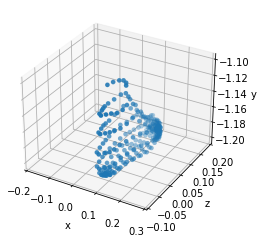

In [32]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_, z_, y_, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
plt.xlim(-0.2,0.3)
plt.ylim(-0.1,0.2)

In [10]:
with open('foot_f.obj', 'rb') as file:
    foot_f = pickle.load(file)

In [11]:
thefile = open('sampleSTAR_test.obj', 'w')
for item in vList_:
    thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in foot_f:
    thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

thefile.close()

In [35]:
print(max(x_)-min(x_))
print(max(y_)-min(y_))
print(max(z_)-min(z_))

0.10546699999999999
0.10067099999999995
0.270632
